# IBM Customer Churn Prediction

<img src="https://raw.githubusercontent.com/ijoseff/ijoseff.github.io/master/assets/img/portfolio/churn.png" width="500" height="250" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IBM-Customer-Churn-Prediction" data-toc-modified-id="IBM-Customer-Churn-Prediction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IBM Customer Churn Prediction</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries-and-Data-Importation" data-toc-modified-id="Libraries-and-Data-Importation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Libraries and Data Importation</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Pre-processing</a></span></li><li><span><a href="#Model-Creation" data-toc-modified-id="Model-Creation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Creation</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#+Model-Creation" data-toc-modified-id="+Model-Creation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>+Model Creation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

Customer Churn occurs when subscribers or customers stop doing business with a company or service. A business typically treats a customer as churned once a specific amount of time has passed since the customers last interaction with the business or service.

Retaining customers is obviously important for companies, because it boosts that companies revenue and helps the company to build a meaningful relationship with the customer. What might not be so obvious is that customer retention is actually more valuable than customer acquisition and there is a lot of data to back this claim.

**Problem:**
 - Predict Customer Churn Machine Learning
 - Predict behavior to retain customers
 - Analyze all relevant customer data and develop focused customer retention programs

**dataset:**
 - the data set contains 7,043 customers and 21 data points on each customer
 - Customers who left within the last month – the column is called Churn
 - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
 - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
 - Demographic info about customers – gender, age range, and if they have partners and dependents
 
**Source:** IBM Sample Data Sets

# Libraries and Data Importation

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset
df = pd.read_csv('project_data/churn.csv')

# Data Exploration

In [3]:
# Check data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Show the numbers of rows and columns
df.shape

(7043, 21)

In [5]:
# Show all the columns
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Check for missing data
df.isnull().mean()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [7]:
# Check data statistics
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,9762-YAQAA,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [8]:
# Check customer churn count
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Data Visualization

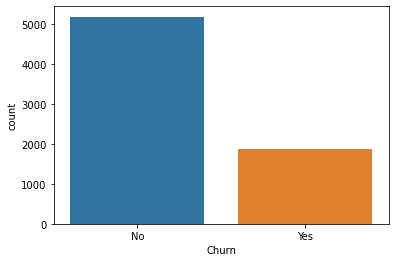

In [9]:
# Visualize the count of customer churn
sns.countplot(df['Churn'])
plt.show()

In [10]:
# Check the percentage of customer that are leaving
num_retained = df[df['Churn'] == 'No'].shape[0]
num_churned = df[df['Churn'] == 'Yes'].shape[0]

# Print the percentage of customer that stayed
print(num_retained / (num_retained + num_churned) * 100, '% of customer stayed with the company')

# Print the percentage of customer that left
print(num_churned / (num_retained + num_churned) * 100, '% of customer left with the company')

73.4630129206304 % of customer stayed with the company
26.536987079369588 % of customer left with the company


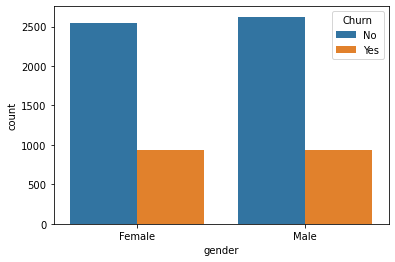

In [11]:
# Visualize the churn count for both male and females
sns.countplot(x = 'gender', hue = 'Churn', data = df)
plt.show()

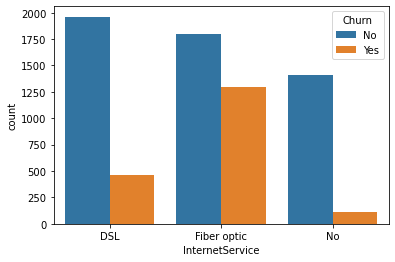

In [12]:
# Visualize the churn count for internet service
sns.countplot(x = 'InternetService', hue = 'Churn', data = df)
plt.show()

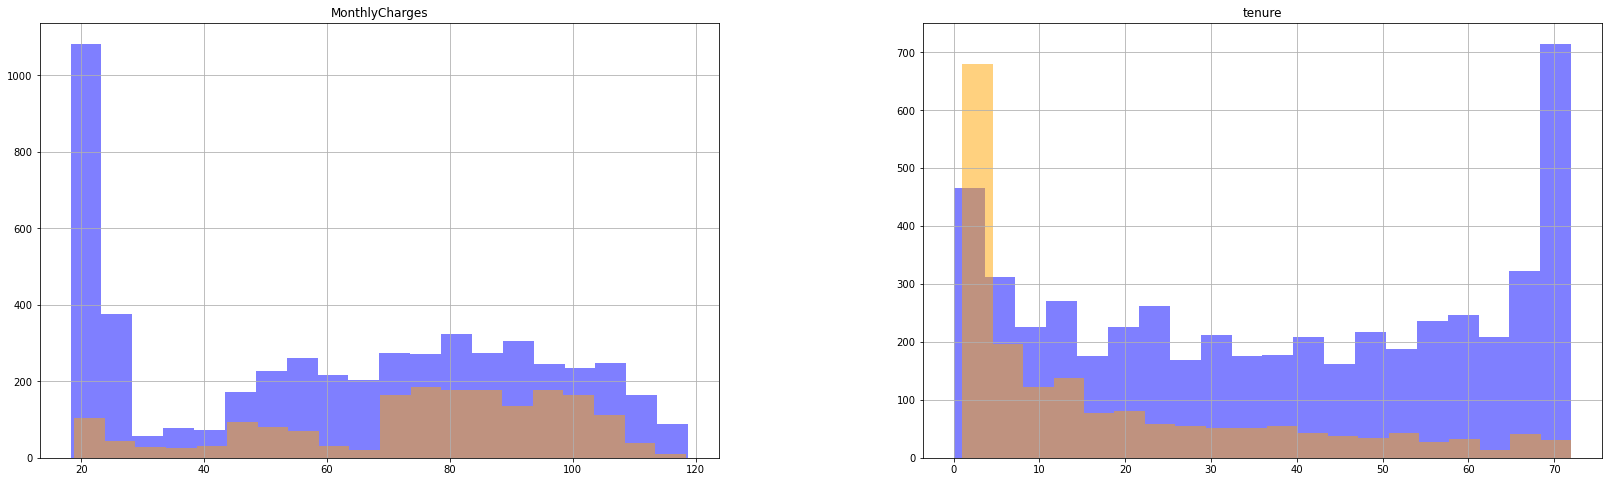

In [13]:
# Create label
numerical_features = ['tenure', 'MonthlyCharges']

# Create subplots
fig, ax = plt.subplots(1, 2, figsize = (28, 8))

df[df['Churn'] == 'No'][numerical_features].hist(bins = 20, color = 'blue', alpha = 0.5, ax= ax)

df[df['Churn'] == 'Yes'][numerical_features].hist(bins = 20, color = 'orange', alpha = 0.5, ax= ax)

plt.show()

# Data Pre-processing

In [14]:
# Remove the unnecessary columns
cleaned_df = df.drop('customerID', axis = 1)

In [15]:
# Check the numbers of rows and columns in the dataset
cleaned_df.shape

(7043, 20)

In [16]:
# Convert all the non-numeric columns to numeric

# Import library
from feature_engine import categorical_encoders as ce

# Set up the encoder
encoder = ce.OrdinalCategoricalEncoder(encoding_method='arbitrary', variables = None)

# fit the encoder
encoder.fit(cleaned_df)

# transform the data
cleaned_df = encoder.transform(cleaned_df)

In [17]:
# Check data type
cleaned_df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [18]:
cleaned_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,0,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,2,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,3,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,6526,0
7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,6527,0
7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,6528,0
7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,74.40,6529,1


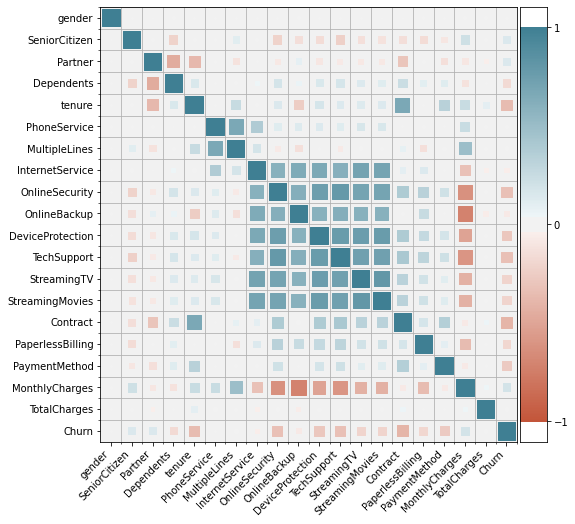

In [250]:
# Check correlation in the features by using heatmap
from heatmap import corrplot
plt.figure(figsize=(8, 8))
corrplot(cleaned_df.corr(), size_scale=300)

In [212]:
# Label the indepedent and dependent variables
x = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']

# Scaled the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [23]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Model Creation

In [402]:
# Create Machine Learning models
def models(X_train, y_train):
    
    # Use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)
    
    # use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)
    
    # Use SVM (Linear Kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)
    
    # Use SVM (RBF Kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, y_train)
    
    # Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    # Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(max_depth= 100, criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
    
    # Use RandomforestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=20, max_depth= 100, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
    
    # Use XGBoost Classifer
    from xgboost import XGBClassifier
    xgb = XGBClassifier(n_jobs = 20, max_depth = 100)
    xgb.fit(X_train, y_train)
    
    # Use Lightgbm Classfier
    import lightgbm
    lgbm = lightgbm.LGBMClassifier()
    lgbm.fit(X_train, y_train)
    
    from catboost import CatBoostClassifier
    cat = CatBoostClassifier(max_depth = 10 , iterations = 5)
    cat.fit(X_train, y_train, eval_set = (X_test, y_test))
    
    # Print the training accuracy for each model
    print('model[0] Logistic Regression Training Accuracy: ', log.score(X_train, y_train))
    print('model[1] KNNeighbors Training Accuracy: ', knn.score(X_train, y_train))
    print('model[2] SVC Linear Training Accuracy: ', svc_lin.score(X_train, y_train))
    print('model[3] SVC RBF Training Accuracy: ', svc_rbf.score(X_train, y_train))
    print('model[4] Gauss Training Accuracy: ', gauss.score(X_train, y_train))
    print('model[5] Decision Tree  Training Accuracy: ', tree.score(X_train, y_train))
    print('model[6] Random Forest Training Accuracy: ', forest.score(X_train, y_train))
    print('model[7] XGBoost Training Accuracy: ', xgb.score(X_train, y_train))
    print('model[8] Lightgbm Training Accuracy: ', lgbm.score(X_train, y_train))
    print('model[9] Catboost Training Accuracy: ', cat.score(X_train, y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest, xgb, lgbm, cat

# Model Evaluation

In [403]:
# Show Training accuracy score
model = models(X_train, y_train)

Learning rate set to 0.486753
0:	learn: 0.5659178	test: 0.5709990	best: 0.5709990 (0)	total: 31ms	remaining: 124ms
1:	learn: 0.4909192	test: 0.5011832	best: 0.5011832 (1)	total: 36.2ms	remaining: 54.3ms
2:	learn: 0.4476318	test: 0.4621623	best: 0.4621623 (2)	total: 89.3ms	remaining: 59.6ms
3:	learn: 0.4203000	test: 0.4396440	best: 0.4396440 (3)	total: 133ms	remaining: 33.3ms
4:	learn: 0.4082373	test: 0.4290021	best: 0.4290021 (4)	total: 139ms	remaining: 0us

bestTest = 0.4290021485
bestIteration = 4

model[0] Logistic Regression Training Accuracy:  0.8061767838125665
model[1] KNNeighbors Training Accuracy:  0.8338658146964856
model[2] SVC Linear Training Accuracy:  0.8054668086616968
model[3] SVC RBF Training Accuracy:  0.8255236066737665
model[4] Gauss Training Accuracy:  0.7103301384451545
model[5] Decision Tree  Training Accuracy:  0.997515086971956
model[6] Random Forest Training Accuracy:  0.9921902733404331
model[7] XGBoost Training Accuracy:  0.997515086971956
model[8] Lightgbm 

In [404]:
# Show the confusion matrix and accuracy for all the models on the test data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

for i in range( len(model) ):
    cm = confusion_matrix(y_test, model[i].predict((X_test)))
    
    # Extract TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
    
    test_score = (TP + TN) / (TN + FP + FN + TP)
    
    print('model[{}] Testing Accuracy: "{}"'.format(i, test_score))

model[0] Testing Accuracy: "0.7970191625266146"
model[1] Testing Accuracy: "0.8090844570617459"
model[2] Testing Accuracy: "0.8055358410220014"
model[3] Testing Accuracy: "0.8176011355571328"
model[4] Testing Accuracy: "0.694819020581973"
model[5] Testing Accuracy: "0.9425124201561391"
model[6] Testing Accuracy: "0.9347054648687012"
model[7] Testing Accuracy: "0.9467707594038325"
model[8] Testing Accuracy: "0.8637331440738112"
model[9] Testing Accuracy: "0.8005677785663591"


In [420]:
# Check classification report
for i in range( len(model) ):
    # Create a predicitions
    predictions = model[i].predict(X_test)

    #Check precision, recall, f1-score
    print('model[{}]:'.format(i))
    print( classification_report(y_test, predictions) )
    print('---------------------------------------------------')

model[0]:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

---------------------------------------------------
model[1]:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1041
           1       0.64      0.61      0.62       368

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409

---------------------------------------------------
model[2]:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1041
           1       0.66      0.54      0.59       368

    accuracy                           0.81     

In [406]:
# Implement-Fold Cross Validation
for i in range( len(model) ):
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model[i], X = X_train, y = y_train, cv = 3)
    print('model[{}] Mean Accuracy:'.format(i), accuracies.mean())
    print('model[{}] Standard Deviation:'.format(i), accuracies.std())
    print('---------------------------------------------------')

model[0] Mean Accuracy: 0.8035143769968052
model[0] Standard Deviation: 0.006901747282649465
---------------------------------------------------
model[1] Mean Accuracy: 0.7623358182463614
model[1] Standard Deviation: 0.01208262153007989
---------------------------------------------------
model[2] Mean Accuracy: 0.8033368832090876
model[2] Standard Deviation: 0.005674251815103218
---------------------------------------------------
model[3] Mean Accuracy: 0.802626908058218
model[3] Standard Deviation: 0.002510141218269567
---------------------------------------------------
model[4] Mean Accuracy: 0.708910188143415
model[4] Standard Deviation: 0.011010338955818851
---------------------------------------------------
model[5] Mean Accuracy: 0.7310969116080938
model[5] Standard Deviation: 0.005014003156487587
---------------------------------------------------
model[6] Mean Accuracy: 0.7887823926162585
model[6] Standard Deviation: 0.006641209419194065
----------------------------------------

In [449]:
# Get the best model
UsedFitter = model[7]

# Create confusion matrix
y_predict = UsedFitter.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
cm

array([[1005,   36],
       [  39,  329]], dtype=int64)

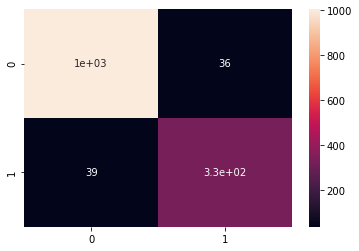

In [450]:
# Visualize confusion matrix
sns.heatmap(cm, annot=True)
plt.show()

In [451]:
# Get feature importance
importances = pd.DataFrame({'feature': x.columns, 'importance': np.round(UsedFitter.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
print(importances.head(10))

                 importance
feature                    
Contract              0.536
InternetService       0.102
OnlineSecurity        0.083
TechSupport           0.032
tenure                0.021
StreamingMovies       0.020
PhoneService          0.020
OnlineBackup          0.019
SeniorCitizen         0.019
Dependents            0.017


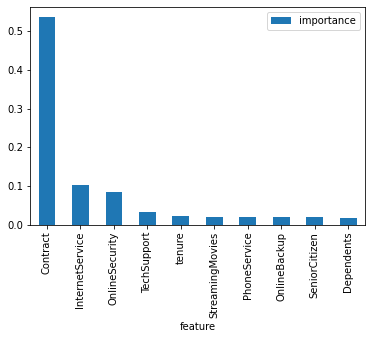

In [452]:
# Visualize the importance
importances.head(10).plot.bar()
plt.show()

# +Model Creation

In [464]:
# Check training dataset dimensions
X_train.shape, X_test.shape

((5634, 19), (1409, 19))

In [465]:
# Import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Build model
model = Sequential([
    Dense(units = 16, input_dim = 19, activation = 'relu'),
    Dense(units = 24, activation = 'relu'),
    Dropout(0.5),
    Dense(units = 24, activation = 'relu'),
    Dense(units = 24, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [466]:
# Check model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                320       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 1,953
Trainable params: 1,953
Non-trainable params: 0
____________________________________________________

In [473]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fit the model and initiate training
history = model.fit(X_train, y_train, batch_size = 15, epochs = 50)

Epoch 1/50
376/376 [==============================] - 1s 1ms/step - loss: 0.4001 - accuracy: 0.8236
Epoch 2/50
376/376 [==============================] - 1s 2ms/step - loss: 0.3991 - accuracy: 0.8234
Epoch 3/50
376/376 [==============================] - 1s 2ms/step - loss: 0.4019 - accuracy: 0.8222
Epoch 4/50
376/376 [==============================] - 1s 2ms/step - loss: 0.3975 - accuracy: 0.8230
Epoch 5/50
376/376 [==============================] - 1s 2ms/step - loss: 0.4019 - accuracy: 0.8214
Epoch 6/50
376/376 [==============================] - 1s 2ms/step - loss: 0.3995 - accuracy: 0.8245
Epoch 7/50
376/376 [==============================] - 1s 2ms/step - loss: 0.3982 - accuracy: 0.8209
Epoch 8/50
376/376 [==============================] - 1s 3ms/step - loss: 0.3972 - accuracy: 0.8262
Epoch 9/50
376/376 [==============================] - 1s 3ms/step - loss: 0.3959 - accuracy: 0.8266
Epoch 10/50
376/376 [==============================] - 1s 3ms/step - loss: 0.3944 - accuracy: 0.8287

In [474]:
# Check model score in test dataset
score = model.evaluate(X_test, y_test)
print(score)

45/45 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8375
[0.40163901448249817, 0.8374733924865723]


In [475]:
# Import libraries
import itertools
from sklearn.metrics import confusion_matrix

# Create a plot function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [476]:
# Get the predictions
y_pred = model.predict(X_test)

# Transform into dataframe
y_test = pd.DataFrame(y_test)

Confusion matrix, without normalization
[[971  70]
 [159 209]]


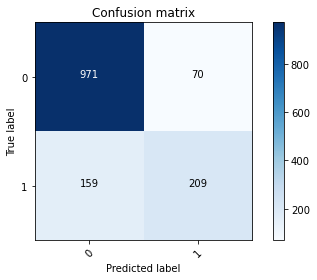

In [477]:
# Check confusion matrix for test dataset
cm =  confusion_matrix(y_test, y_pred.round())

# Visualize confusion matrix for test dataset
plot_confusion_matrix(cm, classes = [0, 1])
plt.show()

Confusion matrix, without normalization
[[4800  374]
 [ 787 1082]]


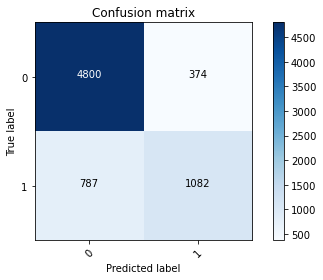

In [478]:
# Apply sampling confusion matrix # Applying the whole parameter # Entire dateset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)

# Create confusion matrix for entire dataset
cm = confusion_matrix(y_expected, y_pred.round())

# Visualize confusion matrix for entire dataset
plot_confusion_matrix(cm, classes = [0, 1])
plt.show()

# Conclusion

Several machine learning models were tested. XGboost model obtained the highest mean accuracy of 95% but in cross validation it got 78% so it is possible that an over fitting occurred. Catboost model was able to achieved 80% mean accuracy and 80% cross validation. Deep Neural Network was also implemented, that achieved 84% accuracy, with 100 iterations.

The accuracy of the model was 84% which is better than the 73.46% that could’ve done just by guessing a customer would always stay with the company. The company may want to lower it’s monthly charges at least for new customers for the first 2 years and stop providing fiber optics internet service, this may be a good strategy to help retain their customers and reduce customer Churn. Maybe with some more analysis on the data and tweaking of the program, I can improve this models performance and accuracy score.